In [ ]:
!pip install ktrain

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text
import tensorflow as tf

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())

print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT AVAILABLE")

1 Physical GPUs, 1 Logical GPUs
Version:  2.5.0
Eager mode:  True
GPU is available


In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/Datasets/malayalam_hasoc_dev.tsv',sep="\t",names=["ID","Tweets","Label"])
data_train = pd.read_excel('/content/drive/MyDrive/Datasets/Malayalam__hasoc_train.xlsx',names=["ID","Tweets","Label"])

In [ ]:
print("Size of train dataset: ",data_train.shape)
print("Size of test dataset: ",data_test.shape)

Size of train dataset:  (4000, 3)
Size of test dataset:  (951, 3)


In [ ]:
data_train = data_train.dropna()
data_train = data_train.reset_index(drop=True)

data_test = data_test.dropna()
data_test = data_test.reset_index(drop=True)

In [ ]:
data_test.head()

,ID,Tweets,Label
0,MA_YT5000,Chenkol vendath thanne aayirunnu....,NOT
1,MA_YT5001,Sundardasinte bhakshnam vakkukal ano?,NOT
2,MA_YT5002,Akasha dooth oru copy adi movie anu 'Who will ...,NOT
3,MA_YT5003,Purath onnum pondade... oru pennum payyanum on...,NOT
4,MA_YT5004,Avasanam Fahad oru Oscar medikkumbazhum lalett...,NOT


In [ ]:
data_train.Label.value_counts()

NOT    2047
OFF    1953
Name: Label, dtype: int64

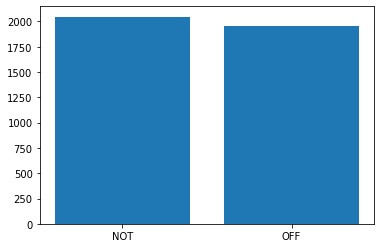

In [ ]:
import matplotlib.pyplot as plt
classes = data_train.Label.unique()
counts = []

for i in classes:
  count = len(data_train[data_train.Label==i])
  counts.append(count)

plt.bar(classes, counts)
plt.show()

In [ ]:
data_train.isnull().sum()

ID        0
Tweets    0
Label     0
dtype: int64

In [ ]:
data_train.Label.unique()

array(['NOT', 'OFF'], dtype=object)

In [ ]:
data_train.Label.value_counts()/data_train.shape[0]*100

NOT    51.187797
OFF    48.812203
Name: Label, dtype: float64

In [ ]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=data_train,
                                                                   text_column = 'Tweets',
                                                                   label_columns = 'Label',
                                                                   val_df = data_test,
                                                                   maxlen = 150,
                                                                   preprocess_mode = 'bert')

['NOT', 'OFF']
   NOT  OFF
0  1.0  0.0
1  0.0  1.0
2  0.0  1.0
3  1.0  0.0
4  0.0  1.0
['NOT', 'OFF']
   NOT  OFF
0  1.0  0.0
1  1.0  0.0
2  1.0  0.0
3  1.0  0.0
4  1.0  0.0
preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [ ]:
model = text.text_classifier(name = 'bert',
                             train_data = (X_train, y_train),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 150
done.


In [ ]:
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train),
                   val_data = (X_test, y_test),
                   batch_size = 30)

In [ ]:
!nvidia-smi

Mon Jul  5 16:12:20 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    71W / 149W |    632MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from sklearn.metrics import classification_report


In [ ]:
learner.fit_onecycle(lr = 2e-5, epochs = 1)
predictor = ktrain.get_predictor(learner.model, preproc)
pred = predictor.predict(data_test.Tweets.tolist())
print(classification_report(data_test.Label.tolist(), pred))

#Corrected the error of wrong label in next cell...model training is done



begin training using onecycle policy with max lr of 2e-05...
134/134 [==============================] - 322s 2s/step - loss: 0.6851 - accuracy: 0.5476 - val_loss: 0.6506 - val_accuracy: 0.6404


AttributeError: ignored

In [ ]:
pred = predictor.predict(data_test.Tweets.tolist())
print(classification_report(data_test.Label.tolist(), pred))

              precision    recall  f1-score   support

         NOT       0.71      0.47      0.56       473
         OFF       0.61      0.81      0.69       478

    accuracy                           0.64       951
   macro avg       0.66      0.64      0.63       951
weighted avg       0.66      0.64      0.63       951



In [ ]:
learner.fit_onecycle(lr = 1e-5, epochs = 1)
predictor = ktrain.get_predictor(learner.model, preproc)
pred = predictor.predict(data_test.Tweets.tolist())
print(classification_report(data_test.Label.tolist(), pred))



begin training using onecycle policy with max lr of 1e-05...
134/134 [==============================] - 290s 2s/step - loss: 0.5443 - accuracy: 0.7289 - val_loss: 0.5690 - val_accuracy: 0.7066
              precision    recall  f1-score   support

         NOT       0.73      0.66      0.69       473
         OFF       0.69      0.76      0.72       478

    accuracy                           0.71       951
   macro avg       0.71      0.71      0.71       951
weighted avg       0.71      0.71      0.71       951



In [ ]:
learner.fit_onecycle(lr = 1e-5, epochs = 1)
predictor = ktrain.get_predictor(learner.model, preproc)
pred = predictor.predict(data_test.Tweets.tolist())
print(classification_report(data_test.Label.tolist(), pred))



begin training using onecycle policy with max lr of 1e-05...
134/134 [==============================] - 290s 2s/step - loss: 0.4558 - accuracy: 0.7844 - val_loss: 0.5468 - val_accuracy: 0.7308
              precision    recall  f1-score   support

         NOT       0.73      0.72      0.73       473
         OFF       0.73      0.74      0.73       478

    accuracy                           0.73       951
   macro avg       0.73      0.73      0.73       951
weighted avg       0.73      0.73      0.73       951



In [ ]:
learner.fit_onecycle(lr = 1e-7, epochs = 1)
predictor = ktrain.get_predictor(learner.model, preproc)
pred = predictor.predict(data_test.Tweets.tolist())
print(classification_report(data_test.Label.tolist(), pred))



begin training using onecycle policy with max lr of 1e-07...
134/134 [==============================] - 290s 2s/step - loss: 0.3648 - accuracy: 0.8507 - val_loss: 0.5463 - val_accuracy: 0.7277
              precision    recall  f1-score   support

         NOT       0.73      0.73      0.73       473
         OFF       0.73      0.73      0.73       478

    accuracy                           0.73       951
   macro avg       0.73      0.73      0.73       951
weighted avg       0.73      0.73      0.73       951



In [ ]:
learner.fit_onecycle(lr = 1e-5, epochs = 2)
predictor = ktrain.get_predictor(learner.model, preproc)
pred = predictor.predict(data_test.Tweets.tolist())
print(classification_report(data_test.Label.tolist(), pred))



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/2
134/134 [==============================] - 291s 2s/step - loss: 0.3701 - accuracy: 0.8335 - val_loss: 0.5540 - val_accuracy: 0.7245
Epoch 2/2
134/134 [==============================] - 291s 2s/step - loss: 0.2861 - accuracy: 0.8832 - val_loss: 0.6054 - val_accuracy: 0.7340
              precision    recall  f1-score   support

         NOT       0.75      0.69      0.72       473
         OFF       0.72      0.77      0.75       478

    accuracy                           0.73       951
   macro avg       0.74      0.73      0.73       951
weighted avg       0.74      0.73      0.73       951



In [ ]:
learner.fit_onecycle(lr = 1e-5, epochs = 2)
predictor = ktrain.get_predictor(learner.model, preproc)
pred = predictor.predict(data_test.Tweets.tolist())
print(classification_report(data_test.Label.tolist(), pred))



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/2
134/134 [==============================] - 291s 2s/step - loss: 0.2288 - accuracy: 0.9097 - val_loss: 0.6451 - val_accuracy: 0.7319
Epoch 2/2
134/134 [==============================] - 290s 2s/step - loss: 0.1754 - accuracy: 0.9307 - val_loss: 0.7352 - val_accuracy: 0.7529
              precision    recall  f1-score   support

         NOT       0.73      0.79      0.76       473
         OFF       0.78      0.71      0.74       478

    accuracy                           0.75       951
   macro avg       0.75      0.75      0.75       951
weighted avg       0.75      0.75      0.75       951

